In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import scale

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.initializers import Initializer
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model


Using TensorFlow backend.


In [32]:
raw_data = pd.read_csv('./data/ordered_molecules.csv')

In [54]:
raw_data.head()

,time,molecule,px,py,pz,ax,ay,az
0,0,1,0.27497,0.22765,0.40548,1.185458,-1.527830,-4.614324
1,0,2,2.13410,1.61428,1.62211,-4.601109,-0.659241,1.090967
2,0,3,12.05408,12.60878,2.90295,4.530882,-2.598597,2.008448
3,0,4,0.85376,1.93829,4.87515,3.975239,0.917088,-2.261618
4,0,5,12.70257,0.12956,6.09076,-1.861295,-0.908830,5.337542


In [17]:
#raw_data_scaled = pd.DataFrame(scale(raw_data.iloc[:,2:], axis = 0))
#raw_data_scaled = pd.concat([raw_data.iloc[:,0:2].reset_index(drop=True), raw_data_scaled.reset_index(drop=True)], axis = 1)

In [ ]:
#raw_data_scaled

In [66]:
def generate_data(t):
    df = raw_data.loc[raw_data['time'] == t]
    
    px_plus = df.iloc[:,2] + 12.9168567587204
    px_origin = df.iloc[:,2]
    px_minus = df.iloc[:,2] - 12.9168567587204
    
    py_plus = df.iloc[:,3] + 12.9168567587204
    py_origin = df.iloc[:,3]
    py_minus = df.iloc[:,3] - 12.9168567587204
    
    pz_plus = df.iloc[:,4] + 12.9168567587204
    pz_origin = df.iloc[:,4]
    pz_minus = df.iloc[:,4] - 12.9168567587204
    
    #plus
    data_mod_1 = pd.concat((px_plus.reset_index(drop=True), py_origin.reset_index(drop=True), pz_origin.reset_index(drop=True)), axis = 1)
    data_mod_2 = pd.concat((px_origin.reset_index(drop=True), py_plus.reset_index(drop=True), pz_origin.reset_index(drop=True)), axis = 1)
    data_mod_3 = pd.concat((px_origin.reset_index(drop=True), py_origin.reset_index(drop=True), pz_plus.reset_index(drop=True)), axis = 1)
    
    data_mod_4 = pd.concat((px_plus.reset_index(drop=True), py_plus.reset_index(drop=True), pz_origin.reset_index(drop=True)), axis = 1)
    data_mod_5 = pd.concat((px_plus.reset_index(drop=True), py_origin.reset_index(drop=True), pz_plus.reset_index(drop=True)), axis = 1)
    data_mod_6 = pd.concat((px_origin.reset_index(drop=True), py_plus.reset_index(drop=True), pz_plus.reset_index(drop=True)), axis = 1)
    
    data_mod_7 = pd.concat((px_plus.reset_index(drop=True), py_plus.reset_index(drop=True), pz_plus.reset_index(drop=True)), axis = 1)
    
    #minus
    data_mod_8 = pd.concat((px_minus.reset_index(drop=True), py_origin.reset_index(drop=True), pz_origin.reset_index(drop=True)), axis = 1)
    data_mod_9 = pd.concat((px_origin.reset_index(drop=True), py_minus.reset_index(drop=True), pz_origin.reset_index(drop=True)), axis = 1)
    data_mod_10 = pd.concat((px_origin.reset_index(drop=True), py_origin.reset_index(drop=True), pz_minus.reset_index(drop=True)), axis = 1)
    
    data_mod_11 = pd.concat((px_minus.reset_index(drop=True), py_minus.reset_index(drop=True), pz_origin.reset_index(drop=True)), axis = 1)
    data_mod_12 = pd.concat((px_minus.reset_index(drop=True), py_origin.reset_index(drop=True), pz_minus.reset_index(drop=True)), axis = 1)
    data_mod_13 = pd.concat((px_origin.reset_index(drop=True), py_minus.reset_index(drop=True), pz_minus.reset_index(drop=True)), axis = 1)
    
    data_mod_14 = pd.concat((px_minus.reset_index(drop=True), py_minus.reset_index(drop=True), pz_minus.reset_index(drop=True)), axis = 1)
    
    #plus + minus
    data_mod_15 = pd.concat((px_origin.reset_index(drop=True), py_plus.reset_index(drop=True), pz_minus.reset_index(drop=True)), axis = 1)
    data_mod_16 = pd.concat((px_origin.reset_index(drop=True), py_minus.reset_index(drop=True), pz_plus.reset_index(drop=True)), axis = 1)
    
    data_mod_17 = pd.concat((px_plus.reset_index(drop=True), py_minus.reset_index(drop=True), pz_origin.reset_index(drop=True)), axis = 1)
    data_mod_18 = pd.concat((px_minus.reset_index(drop=True), py_plus.reset_index(drop=True), pz_origin.reset_index(drop=True)), axis = 1)
    
    data_mod_19 = pd.concat((px_plus.reset_index(drop=True), py_origin.reset_index(drop=True), pz_minus.reset_index(drop=True)), axis = 1)
    data_mod_20 = pd.concat((px_minus.reset_index(drop=True), py_origin.reset_index(drop=True), pz_plus.reset_index(drop=True)), axis = 1)
    
    #3
    data_mod_21 = pd.concat((px_plus.reset_index(drop=True), py_minus.reset_index(drop=True), pz_plus.reset_index(drop=True)), axis = 1)
    data_mod_22 = pd.concat((px_plus.reset_index(drop=True), py_minus.reset_index(drop=True), pz_minus.reset_index(drop=True)), axis = 1)
    
    data_mod_23 = pd.concat((px_minus.reset_index(drop=True), py_plus.reset_index(drop=True), pz_plus.reset_index(drop=True)), axis = 1)
    data_mod_24 = pd.concat((px_minus.reset_index(drop=True), py_minus.reset_index(drop=True), pz_plus.reset_index(drop=True)), axis = 1)
    
    data_mod_25 = pd.concat((px_plus.reset_index(drop=True), py_minus.reset_index(drop=True), pz_minus.reset_index(drop=True)), axis = 1)
    data_mod_26 = pd.concat((px_minus.reset_index(drop=True), py_plus.reset_index(drop=True), pz_minus.reset_index(drop=True)), axis = 1)
    
    data_mod_27 = pd.concat((px_origin.reset_index(drop=True), py_origin.reset_index(drop=True), pz_origin.reset_index(drop=True)), axis = 1)
    
    combined_df = pd.concat([data_mod_27.reset_index(drop=True), data_mod_1.reset_index(drop=True), data_mod_2.reset_index(drop=True), data_mod_3.reset_index(drop=True), 
                           data_mod_4.reset_index(drop=True), data_mod_5.reset_index(drop=True), data_mod_6.reset_index(drop=True), data_mod_7.reset_index(drop=True), 
                           data_mod_8.reset_index(drop=True), data_mod_9.reset_index(drop=True), data_mod_10.reset_index(drop=True), data_mod_11.reset_index(drop=True),
                           data_mod_12.reset_index(drop=True), data_mod_13.reset_index(drop=True), data_mod_14.reset_index(drop=True), data_mod_15.reset_index(drop=True),
                           data_mod_16.reset_index(drop=True), data_mod_17.reset_index(drop=True), data_mod_18.reset_index(drop=True), data_mod_19.reset_index(drop=True),
                           data_mod_20.reset_index(drop=True), data_mod_21.reset_index(drop=True), data_mod_22.reset_index(drop=True), data_mod_23.reset_index(drop=True),
                           data_mod_24.reset_index(drop=True), data_mod_25.reset_index(drop=True), data_mod_26.reset_index(drop=True)], axis = 0, ignore_index = True)
    
    
    df_acc = pd.concat([df.iloc[:,5:].reset_index(drop=True), df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),
                        df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),
                        df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),
                        df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),
                        df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),
                        df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),
                        df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True)], axis = 0, ignore_index = True)
    
    mol_num = range(1,combined_df.shape[0]+1)
    combined_df['molecule'] = mol_num
    
    result_df = pd.concat([df_acc.reset_index(drop=True), combined_df.reset_index(drop=True)], axis = 1, ignore_index = True)
    result_df.columns = ["ax", "ay", "az", "px", "py", "pz", "molecule"]
    
    result_df = result_df[["molecule", "px", "py", "pz", "ax", "ay", "az"]]
    return(result_df)

In [67]:
generate_data(0)

,molecule,px,py,pz,ax,ay,az
0,1,0.274970,0.227650,0.405480,1.185458,-1.527830,-4.614324
1,2,2.134100,1.614280,1.622110,-4.601109,-0.659241,1.090967
2,3,12.054080,12.608780,2.902950,4.530882,-2.598597,2.008448
3,4,0.853760,1.938290,4.875150,3.975239,0.917088,-2.261618
4,5,12.702570,0.129560,6.090760,-1.861295,-0.908830,5.337542
5,6,1.063940,1.395880,8.051720,2.984083,3.021378,-2.083314
6,7,0.159280,12.579880,9.416030,-2.773368,1.320404,0.073289
7,8,1.922140,1.824390,11.307270,-2.901205,-0.454694,0.240227
8,9,0.219070,3.176400,12.756460,-0.610102,0.700844,-0.335467
9,10,1.342560,5.151660,1.906300,6.847360,-3.161887,-5.186860


In [61]:
def find_neighbors(t):
    df_t = generate_data(t)
    
    k = 6
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='brute').fit(df_t)
    distances, indices = nbrs.kneighbors(df_t)
    return(k, df_t, indices[0:128])

In [68]:
def make_df(t):
    t_plus_1_df = raw_data.loc[raw_data['time']==t+1]
    t_plus_1_values = t_plus_1_df.iloc[:,2:8]
    
    li = []
    k, df, idx = find_neighbors(t)
    for i in range(0,idx.shape[0]):
        rows = []
        for j in range(0,k):
            row = df.loc[df['molecule'] == (idx[i][j]+1)]
            row_cut = np.asarray(row.iloc[:,1:])
            rows.append(row_cut)
        
        li.append(np.array(rows).ravel())
        
    res = pd.DataFrame(li)
    df_made = pd.concat([res.reset_index(drop=True), t_plus_1_values.reset_index(drop=True)], axis = 1)
    return(df_made)

In [70]:
make_df(1)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,px,py,pz,ax,ay,az
0,0.27747,0.22691,0.40192,1.173813,-1.541970,-4.631340,0.85851,1.94084,4.87902,3.846336,...,4.96219,0.477074,0.531102,0.111466,0.28004,0.22608,0.39813,1.161030,-1.555290,-4.646868
1,2.13367,1.62206,1.61886,-4.672077,-0.805457,1.064703,0.27747,0.22691,0.40192,1.173813,...,4.96219,0.477074,0.531102,0.111466,2.13301,1.62977,1.61568,-4.748614,-0.954831,1.043398
2,12.05656,12.60888,2.89414,4.432026,-2.609304,2.213726,12.55824,3.43492,2.20354,-0.381056,...,4.87902,3.846336,0.828634,-2.289510,12.05926,12.60884,2.88547,4.338581,-2.607360,2.413316
3,0.85851,1.94084,4.87902,3.846336,0.828634,-2.289510,1.06904,1.39639,8.05741,2.837450,...,1.61886,-4.672077,-0.805457,1.064703,0.86346,1.94342,4.88275,3.717136,0.732364,-2.319824
4,12.70216,0.12829,6.09563,-1.790789,-0.845025,5.255177,12.55824,3.43492,2.20354,-0.381056,...,11.30875,-3.003942,-0.412420,0.234313,12.70166,0.12699,6.10076,-1.717830,-0.783814,5.165356
5,1.06904,1.39639,8.05741,2.837450,3.041534,-2.144288,0.85851,1.94084,4.87902,3.846336,...,8.15898,-1.042260,0.727869,-2.701415,1.07428,1.39705,8.06297,2.692217,3.058079,-2.201791
6,0.15627,12.57742,9.41816,-2.733294,1.435877,-0.048323,0.21989,3.17414,12.76061,-0.605283,...,12.53494,-1.409434,2.312594,0.237731,0.15313,12.57504,9.42028,-2.685142,1.553229,-0.170060
7,1.92966,1.82290,11.30875,-3.003942,-0.412420,0.234313,0.21989,3.17414,12.76061,-0.605283,...,11.39428,0.278914,0.232813,0.038735,1.93700,1.82139,11.31025,-3.098466,-0.374209,0.228487
8,0.21989,3.17414,12.76061,-0.605283,0.667040,-0.499314,1.92966,1.82290,11.30875,-3.003942,...,4.96219,0.477074,0.531102,0.111466,0.22067,3.17192,12.76473,-0.600735,0.632467,-0.664390
9,1.34107,5.14844,1.90200,6.803965,-3.093445,-5.090460,0.85851,1.94084,4.87902,3.846336,...,0.40192,1.173813,-1.541970,-4.631340,1.33994,5.14508,1.89745,6.753036,-3.024238,-4.988542


In [71]:
#make whole dataset
final_data = make_df(0)

for t in range(1,1999):
    df_part = make_df(t)
    final_data = pd.concat([final_data.reset_index(drop=True), df_part.reset_index(drop=True)], axis = 0, ignore_index=True)

In [74]:
final_data.tail()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,px,py,pz,ax,ay,az
255867,10.61893,9.19931,8.07314,-1.117306,3.729599,-1.309010,9.50165,10.43202,10.00620,1.619934,...,8.67506,3.562240,-3.790684,-2.208148,10.61230,9.20293,8.07598,-1.025038,3.645025,-1.280867
255868,12.28521,7.63572,8.67506,3.562240,-3.790684,-2.208148,9.50165,10.43202,10.00620,1.619934,...,8.19210,-0.453895,-0.696763,-1.315316,12.28148,7.63805,8.68123,3.634594,-3.766582,-2.338953
255869,6.03319,12.80925,6.04868,1.966739,5.790018,5.545910,10.61893,9.19931,8.07314,-1.117306,...,5.80910,3.351908,1.592475,9.362972,6.03300,12.81292,6.05135,2.307742,5.650190,5.404642
255870,9.50165,10.43202,10.00620,1.619934,-1.090169,-0.924991,12.00595,11.18273,11.89492,-0.597181,...,9.91396,2.201449,2.367211,0.584105,9.50306,10.44102,9.99912,1.395564,-1.232665,-0.779073
255871,12.00595,11.18273,11.89492,-0.597181,-1.916267,0.042068,9.50165,10.43202,10.00620,1.619934,...,8.07314,-1.117306,3.729599,-1.309010,12.01283,11.18948,11.90577,-0.730089,-1.992210,-0.056095


In [75]:
##########################################################
################# save dataframe #########################
final_data.to_csv('./data/KNN_5_expand.csv', index = False)

In [37]:
#final_data = pd.read_csv('./data/KNN_5_expand.csv')

In [42]:
final_data.tail()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,0.1,1.1,2.1,3.1,4.1,5.1
255540,1.125765,0.717344,0.427369,-0.408145,1.361006,-0.457884,1.571953,0.298269,0.588309,1.301269,...,0.944228,0.591754,-0.397822,-0.323556,1.123990,0.718315,0.428128,-0.374440,1.330143,-0.448040
255541,1.571953,0.298269,0.588309,1.301269,-1.383293,-0.772398,1.125765,0.717344,0.427369,-0.408145,...,0.539173,0.609138,0.033438,-0.400974,1.570954,0.298894,0.589959,1.327699,-1.374498,-0.818153
255542,-0.102181,1.684884,-0.113929,0.718441,2.112893,1.939931,0.194436,1.507601,-0.600115,1.860131,...,0.067469,-2.019907,-2.652238,0.381635,-0.102232,1.685867,-0.113215,0.843007,2.061867,1.890516
255543,0.826585,1.047736,0.944228,0.591754,-0.397822,-0.323556,0.449703,1.495562,0.935043,-1.412333,...,0.427369,-0.408145,1.361006,-0.457884,0.826963,1.050149,0.942335,0.509793,-0.449822,-0.272515
255544,1.497174,1.248942,1.449231,-0.218146,-0.699282,0.014716,1.343230,1.372964,0.793929,-0.996670,...,0.935043,-1.412333,1.014507,-0.011753,1.499017,1.250751,1.452132,-0.266697,-0.726995,-0.019621


In [76]:
diff_x = final_data.iloc[:,36] - final_data.iloc[:,0]
diff_y = final_data.iloc[:,37] - final_data.iloc[:,1]
diff_z = final_data.iloc[:,38] - final_data.iloc[:,2]


diff_x_idx, = np.where(abs(diff_x) > 3)
diff_y_idx, = np.where(abs(diff_y) > 3)
diff_z_idx, = np.where(abs(diff_z) > 3)

diff_idx = set(diff_x_idx) | set(diff_y_idx) | set(diff_z_idx)

final_data = final_data.loc[final_data.index.drop(list(diff_idx))]

In [77]:
x_train, x_test, y_train, y_test = train_test_split(final_data.iloc[:,0:36], 
                                                    final_data.iloc[:,36:],
                                                    test_size = 0.3, random_state = 10)

In [78]:
#model 1
model_1 = Sequential()

model_1.add(Dense(32, input_dim=36, activation='relu', kernel_initializer = 'he_normal', kernel_regularizer = regularizers.l2(0.01)))
model_1.add(BatchNormalization())

model_1.add(Dense(32, activation='relu', kernel_initializer = 'he_normal', kernel_regularizer = regularizers.l2(0.01)))
model_1.add(BatchNormalization())

model_1.add(Dense(32, activation='relu', kernel_initializer = 'he_normal', kernel_regularizer = regularizers.l2(0.01)))
model_1.add(BatchNormalization())

model_1.add(Dense(6, activation='linear', kernel_initializer = 'glorot_normal', kernel_regularizer = regularizers.l2(0.01)))

In [79]:
model_1.compile(loss='mean_absolute_error', optimizer= 'rmsprop', metrics=['mae'])

early_stop = EarlyStopping(monitor='val_loss', patience=20, mode='min')
model_check_point = ModelCheckpoint('./model/KNN_5_expand.h5', monitor = 'val_loss', verbose=2, save_best_only=True)

callback_list = [model_check_point, early_stop]

In [80]:
hist_1 = model_1.fit(x_train.values, y_train.values, epochs=150, batch_size=64, validation_data=(x_test, y_test), callbacks = callback_list)

Train on 178881 samples, validate on 76664 samples
Epoch 1/150
178881/178881 [==============================] - 10s 55us/step - loss: 1.3027 - mean_absolute_error: 0.8652 - val_loss: 0.4959 - val_mean_absolute_error: 0.2910

Epoch 00001: val_loss improved from inf to 0.49589, saving model to ./model/KNN_5_expand.h5
Epoch 2/150
178881/178881 [==============================] - 9s 49us/step - loss: 0.6130 - mean_absolute_error: 0.4528 - val_loss: 0.3906 - val_mean_absolute_error: 0.2583

Epoch 00002: val_loss improved from 0.49589 to 0.39060, saving model to ./model/KNN_5_expand.h5
Epoch 3/150
178881/178881 [==============================] - 9s 49us/step - loss: 0.5601 - mean_absolute_error: 0.4424 - val_loss: 0.5290 - val_mean_absolute_error: 0.4216

Epoch 00003: val_loss did not improve from 0.39060
Epoch 4/150
178881/178881 [==============================] - 9s 48us/step - loss: 0.5300 - mean_absolute_error: 0.4311 - val_loss: 0.3156 - val_mean_absolute_error: 0.2243

Epoch 00004: val_

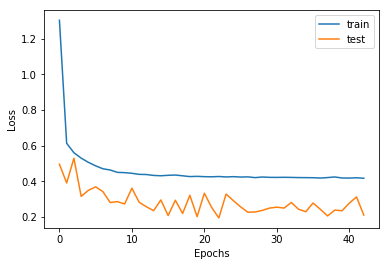

In [81]:
# plot history
plt.plot(hist_1.history['loss'], label='train')
plt.plot(hist_1.history['val_loss'], label='test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [82]:
model = load_model('./model/KNN_5_expand.h5')

In [83]:
y_pred = pd.DataFrame(model.predict(x_test))

In [84]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae_metric = mean_absolute_error(y_test, y_pred)
r2_error = r2_score(y_test.values, y_pred)

In [85]:
print("MSE:", mse)
print("RMSE: ", rmse)
print("MAE: ", mae_metric)
print("R2_Score:", r2_error)

MSE: 0.04441812732405246
RMSE:  0.21075608490397724
MAE:  0.15305460207281163
R2_Score: 0.9946657338304518


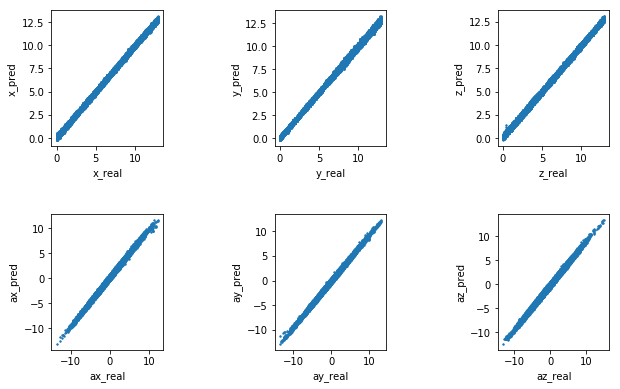

In [86]:
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(3,3,1)
ax2 = fig.add_subplot(3,3,2)
ax3 = fig.add_subplot(3,3,3)
ax4 = fig.add_subplot(3,3,4)
ax5 = fig.add_subplot(3,3,5)
ax6 = fig.add_subplot(3,3,6)

ax1.scatter(y_test.values[:,0], y_pred.iloc[:,0], s= 2)
ax1.set_xlabel('x_real')
ax1.set_ylabel('x_pred')
#ax1.set_xlim((-2.5, 2.5))
#ax1.set_ylim((-2.5, 2.5))
ax2.scatter(y_test.values[:,1], y_pred.iloc[:,1], s= 2)
ax2.set_xlabel('y_real')
ax2.set_ylabel('y_pred')
#ax2.set_xlim((-2.5, 2.5))
#ax2.set_ylim((-2.5, 2.5))
ax3.scatter(y_test.values[:,2], y_pred.iloc[:,2], s= 2)
ax3.set_xlabel('z_real')
ax3.set_ylabel('z_pred')
#ax3.set_xlim((-2.5, 2.5))
#ax3.set_ylim((-2.5, 2.5))
ax4.scatter(y_test.values[:,3], y_pred.iloc[:,3], s= 2)
ax4.set_xlabel('ax_real')
ax4.set_ylabel('ax_pred')
#ax4.set_xlim((-2.5, 2.5))
#ax4.set_ylim((-2.5, 2.5))
ax5.scatter(y_test.values[:,4], y_pred.iloc[:,4], s= 2)
ax5.set_xlabel('ay_real')
ax5.set_ylabel('ay_pred')
#ax5.set_xlim((-2.5, 2.5))
#ax5.set_ylim((-2.5, 2.5))
ax6.scatter(y_test.values[:,5], y_pred.iloc[:,5], s= 2)
ax6.set_xlabel('az_real')
ax6.set_ylabel('az_pred')
#ax6.set_xlim((-2.5, 2.5))
#ax6.set_ylim((-2.5, 2.5))

plt.subplots_adjust(wspace = 1, hspace = 0.5)
plt.show()

In [87]:
#cross validation

kfold = KFold(n_splits=20, shuffle=True, random_state = 500)
data = final_data
X = final_data.iloc[:,0:36]
Y = final_data.iloc[:,36:]

cv_rmse = []
cv_mae = []
cv_r2 = []

for train, test in kfold.split(X, Y):
    
    # evaluate the model
    pred = model.predict(X.iloc[test,:])
    
    rmse = np.sqrt(mean_squared_error(Y.iloc[test,:], pred))
    mae = mean_absolute_error(Y.iloc[test,:], pred)
    r2 = r2_score(Y.iloc[test,:], pred)
    
    cv_rmse.append(rmse)
    cv_mae.append(mae)
    cv_r2.append(r2)

In [88]:
print(np.mean(cv_rmse))
print(np.std(cv_rmse))
print('\n')

print(np.mean(cv_mae))
print(np.std(cv_mae))
print('\n')

print(np.mean(cv_r2))
print(np.std(cv_r2))

0.21100126118346396
0.0010139233593861074


0.15315747121462242
0.0006701594326460625


0.9946675934536147
5.1018434112252424e-05
